In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# always fix RANDOM_SEED to keep your experiments reproducible!
RANDOM_SEED = 42

In [3]:
# fix the version of the packages so that the experiments are reproducible:
!pip freeze > requirements.txt

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [8]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [9]:
# IMPORTANT! For correct processing of features, we combine the train and test into one dataset
df_train['sample'] = 1 # mark where we have train
df_test['sample'] = 0 # mark where we have test
df_test['Rating'] = 0 # in the test we don't have the Rating value, we must predict it, so for now we just fill it with zeros

df = df_test.append(df_train, sort=False).reset_index(drop=True) # unite

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
 9   sample             10000 non-null  int64  
 10  Rating             10000 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Первоначальная версия датасета состоит из десяти столбцов, содержащих следующую информацию:

* Restaurant_id — идентификационный номер ресторана / сети ресторанов;
* City — город, в котором находится ресторан;
* Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
* Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
* Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
* Price Range — диапазон цен в ресторане;
* Number of Reviews — количество отзывов о ресторане;
* Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
* URL_TA — URL страницы ресторана на TripAdvisor;
* ID_TA — идентификатор ресторана в базе данных TripAdvisor

In [12]:
df.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
45921,id_5017,Madrid,['American'],5020.0,$$ - $$$,89.0,"[['Average price but a filling meal.', 'Yummy ...",/Restaurant_Review-g187514-d942426-Reviews-Fos...,d942426,1,3.5
7497,id_7497,London,"['Cafe', 'European', 'Vegetarian Friendly']",12892.0,$$ - $$$,20.0,"[['Lovely place for lunch or tea', 'Quiet and ...",/Restaurant_Review-g186338-d9788607-Reviews-Pa...,d9788607,0,0.0
30457,id_2519,Lisbon,"['European', 'Portuguese']",2522.0,$$ - $$$,12.0,"[['The best bitoque in Lisbon!!'], ['09/26/201...",/Restaurant_Review-g189158-d3842372-Reviews-Cr...,d3842372,1,4.0
8452,id_8452,Berlin,NaN,4592.0,NaN,7.0,"[['Croatian Restaurant in Charlottenburg', 'Li...",/Restaurant_Review-g187323-d1346068-Reviews-Es...,d1346068,0,0.0
15109,id_4829,Barcelona,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",4830.0,$$ - $$$,57.0,"[['Appauling service', 'Bad service'], ['05/13...",/Restaurant_Review-g187497-d5796134-Reviews-Il...,d5796134,1,3.5


As you can see, there are many gaps in the data. It is necessary to clean up and preprocess variables

**PREPROCESSING**

*Price Range*

In [13]:
df['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

As we can see the prices are divided into three categories. It is advisable to replace the values ​​with numeric (1, 2,3) ascending price category

In [14]:
pr = {'$' : 1, '$$ - $$$' : 2, '$$$$' : 3}
df['Price Range'] = df['Price Range'].map(pr)
df['Price Range']

0        2.0
1        2.0
2        2.0
3        3.0
4        3.0
        ... 
49995    2.0
49996    2.0
49997    NaN
49998    2.0
49999    2.0
Name: Price Range, Length: 50000, dtype: float64

We can also see the presence of gaps in the list of values. Replace NaN with the most common value (2)

In [15]:
df['Price Range'] = df['Price Range'].fillna(2)
df['Price Range']

0        2.0
1        2.0
2        2.0
3        3.0
4        3.0
        ... 
49995    2.0
49996    2.0
49997    2.0
49998    2.0
49999    2.0
Name: Price Range, Length: 50000, dtype: float64

Now, after processing the Price Range column, we can analyze the dependence of the restaurant's rating on the price range

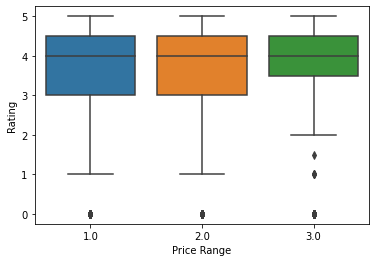

In [16]:
sns.boxplot(x='Price Range', y='Rating', data=df);

As can be seen from boxplot, low and high-priced restaurants have better ratings

*Cuisine Style*

In [17]:
df['Cuisine Style']

0                                           ['Bar', 'Pub']
1        ['European', 'Scandinavian', 'Gluten Free Opti...
2                                  ['Vegetarian Friendly']
3        ['Italian', 'Mediterranean', 'European', 'Vege...
4        ['Italian', 'Mediterranean', 'European', 'Seaf...
                               ...                        
49995    ['Italian', 'Vegetarian Friendly', 'Vegan Opti...
49996    ['French', 'American', 'Bar', 'European', 'Veg...
49997                                ['Japanese', 'Sushi']
49998    ['Polish', 'European', 'Eastern European', 'Ce...
49999                                          ['Spanish']
Name: Cuisine Style, Length: 50000, dtype: object

 Replace NaN in 'Cuisine Style' with the most popular cuisine

In [18]:
def replace_cuisine(x):
    if pd.isna(x):
        return x # NaN remains as it is, we do not change to nan
    else:
        replace_list = ['[',']',"'"]
        for value in replace_list:
            x = x.replace(value,'')
        return x.replace(', ',',')
# clear the values in the column
df['Cuisine Style'] = df['Cuisine Style'].apply(replace_cuisine)
# count the frequency of each kitchen
max_count_cusine = Counter(df['Cuisine Style'].str.cat(sep=',').split(','))
# sort the resulting dictionary in descending order and take the first three kitchens
three_cuisine_list = list(max_count_cusine.items())
three_cuisine_list.sort(key=lambda i: i[1],reverse=True)
three_cuisine_list = list(dict(three_cuisine_list[:3]).keys())
three_cuisine_list =  ','.join(three_cuisine_list)
# change NaN to the first three kitchens from the list
df['Cuisine Style'] = df['Cuisine Style'].apply(lambda x: three_cuisine_list if pd.isna(x) else x)
df['Cuisine Style']

0                                                  Bar,Pub
1        European,Scandinavian,Gluten Free Options,Vege...
2                                      Vegetarian Friendly
3        Italian,Mediterranean,European,Vegetarian Frie...
4        Italian,Mediterranean,European,Seafood,Vegetar...
                               ...                        
49995    Italian,Vegetarian Friendly,Vegan Options,Glut...
49996     French,American,Bar,European,Vegetarian Friendly
49997                                       Japanese,Sushi
49998    Polish,European,Eastern European,Central Europ...
49999                                              Spanish
Name: Cuisine Style, Length: 50000, dtype: object

In [19]:
# Create dummy variables from the column 'Cuisine Style'
df = pd.get_dummies(df, columns=['Cuisine Style'])

***Reviews***

Select the gaps as a separate feature

In [20]:
df['review_is_NAN'] = (df.Reviews == '[[], []]').astype('uint8')
df['review_is_NAN'] = pd.isna(df.Reviews).astype('uint8')

Separate dates

In [21]:
df['date_review'] = df['Reviews'].apply(
    lambda x: [0] if pd.isna(x) else x[2:-2].split('], [')[1][1:-1].split("', '"))
df['date_review']

0                              []
1        [12/05/2017, 10/29/2017]
2        [12/28/2017, 12/06/2017]
3        [12/06/2017, 11/22/2017]
4        [02/08/2018, 01/24/2018]
                   ...           
49995    [12/16/2017, 11/12/2017]
49996    [12/21/2017, 12/12/2017]
49997    [11/03/2016, 04/12/2008]
49998    [07/11/2017, 06/18/2017]
49999    [01/31/2016, 07/04/2012]
Name: date_review, Length: 50000, dtype: object

***Number of reviews***

In [22]:
df['Number of Reviews']=df['Number of Reviews'].fillna(round(df['Number of Reviews'].mean()))
df['Number of Reviews']

0          4.0
1         97.0
2         28.0
3        202.0
4        162.0
         ...  
49995     79.0
49996    542.0
49997      4.0
49998     70.0
49999    260.0
Name: Number of Reviews, Length: 50000, dtype: float64

Determine the number of days between reviews

In [23]:
df['number_days_reviews'] = df.date_review.apply(
    lambda x: None if x == [] else pd.to_datetime(x).max() - pd.to_datetime(x).min()).dt.days
df['number_days_reviews'].head(15)

0       NaN
1      37.0
2      22.0
3      14.0
4      15.0
5       5.0
6       NaN
7       NaN
8      88.0
9      34.0
10     78.0
11     83.0
12      0.0
13    374.0
14     48.0
Name: number_days_reviews, dtype: float64

Fill cells with spaces with the average value of the number of days between dates

In [24]:
mean_day = df['number_days_reviews'].mean()
df['number_days_reviews'] =df['number_days_reviews'].fillna(round(mean_day))
df['number_days_reviews']

0         123.0
1          37.0
2          22.0
3          14.0
4          15.0
          ...  
49995      34.0
49996       9.0
49997    3127.0
49998      23.0
49999    1306.0
Name: number_days_reviews, Length: 50000, dtype: float64

***Create a new attribute: the number of reviews by city***

<AxesSubplot:xlabel='City'>

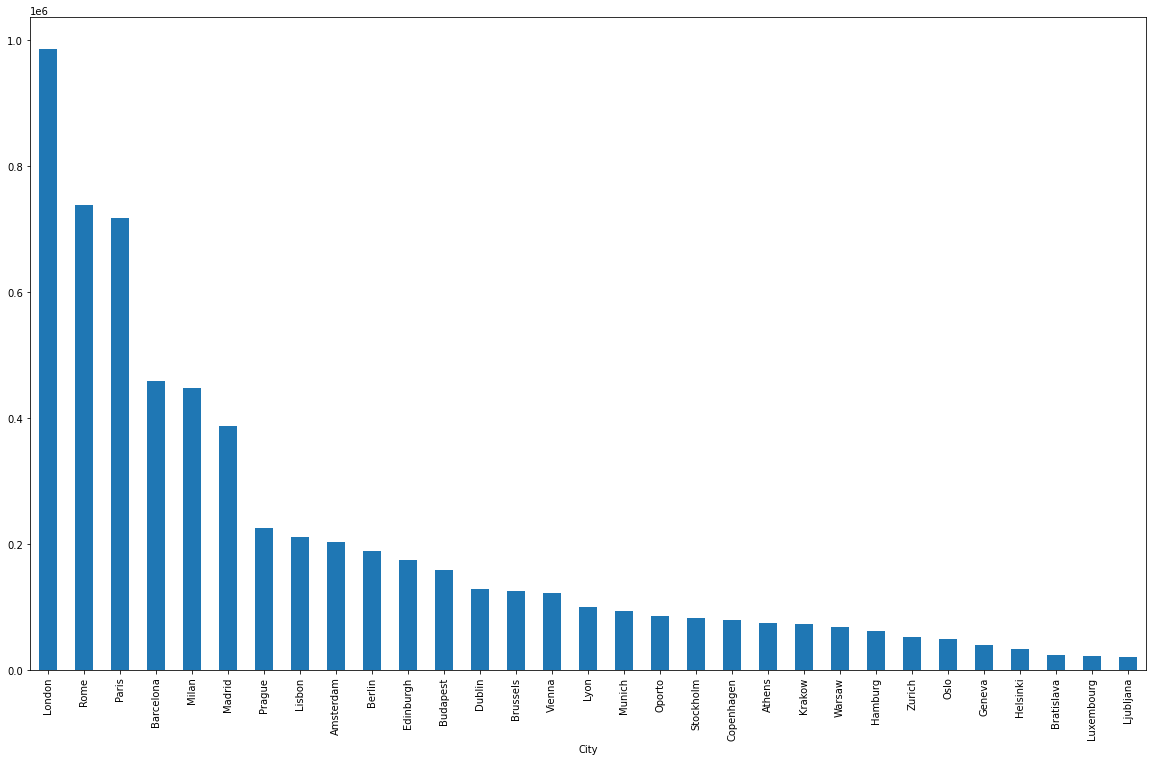

In [25]:
plt.figure(figsize=(20,12))
df.groupby('City')['Number of Reviews'].sum().sort_values(ascending=False).plot(kind='bar')

As we can see from the diagram, the larger the city, the more reviews

In [26]:
count_reviews_city = dict(df.groupby('City')['Number of Reviews'].sum())
df['count_reviews_city'] = df.City.map(count_reviews_city)

***Сreate a sign: the number of population***

So we saw the connection between the number of reviews and the cities. We found that the larger the city, the more reviews. Now we need to introduce a new variable that displays the size of the city - this is the number of population

In [27]:
population_size = {'Warsaw' : 1793579,
    'Dublin' : 554554,
    'Copenhagen' : 794128,
    'Athens' : 664046,
    'Edinburgh' : 488050, 
    'Zurich' : 415215,
    'Oporto' : 287591,
    'Geneva' : 201818, 
    'Krakow' : 779115, 
    'Oslo' : 697549, 
    'Helsinki' : 656229,
    'Bratislava' : 437726,
    'Luxembourg' : 626108,
    'Ljubljana' : 295504,
    'London' : 8909081,
    'Paris' : 2148271,
    'Madrid' : 3223334,
    'Barcelona' : 1620343,
    'Berlin' : 3769495,
    'Milan' : 1399860,
    'Rome' : 2860009,
    'Prague' : 1324277,
    'Lisbon' : 505526,
    'Vienna' : 2600000,
    'Amsterdam' : 872680,
    'Brussels' : 1208542,
    'Hamburg' : 1845229,
    'Munich' : 1484226,
    'Lyon' : 516092,
    'Stockholm' : 975904,
    'Budapest' : 1752286}
df['population_size'] = df.City.map(population_size)

***Сreate a sign: purchasing power index***

In [28]:
index_pp = {'Geneva' : 3, 
    'Krakow' : 36, 
    'Oslo' : 17, 
    'Helsinki' : 9,
    'Bratislava' : 39,
    'Luxembourg' : 4,
    'Ljubljana' : 32,
    'Stockholm' : 13,
    'Budapest' : 51,
    'Warsaw' : 29,
    'Dublin' : 27,
    'Copenhagen' : 10,
    'Athens' : 53,
    'Edinburgh' : 16, 
    'Zurich' : 2,
    'Oporto' : 42,
    'London' : 24,
    'Paris' : 22,
    'Madrid' : 23,
    'Barcelona' : 30,
    'Berlin' : 8,
    'Milan' : 40,
    'Rome' : 37,
    'Prague' : 31,
    'Lisbon' : 48,
    'Vienna' : 21,
    'Amsterdam' : 19,
    'Brussels' : 15,
    'Hamburg' : 7,
    'Munich' : 6,
    'Lyon' : 70,}

df['index_pp'] = df.City.map(index_pp)

***Create a variable number of restaurants in the city***

In [29]:
# number of restaurants in the city
restaurants_count_city = df.groupby('City')['Ranking'].count().to_dict()
df['restaurants_count_city'] = df['City'].map(restaurants_count_city)

***Create a variable for the dependence of the number of restaurants on the population***

In [30]:
# Сalculate the number of restaurants per 1000 people for the city
df['restaurants_population'] = df['restaurants_count_city'] / (df['population_size']/1000)

***Create dummy variables from the column 'City'***

In [31]:
df = pd.get_dummies(df, columns=['City'], dummy_na=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 10781 entries, Restaurant_id to City_nan
dtypes: float64(7), int64(4), object(5), uint8(10765)
memory usage: 519.4+ MB


In [33]:
df_preproc = df.drop(['Restaurant_id', 'Reviews', 'URL_TA', 'ID_TA', 'date_review'], axis=1)

In [34]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 10776 entries, Ranking to City_nan
dtypes: float64(7), int64(4), uint8(10765)
memory usage: 517.5 MB


In [35]:
# select the test part
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # target variable
X = train_data.drop(['Rating'], axis=1)

Before sending our data for training, let's divide the data into one more test and train for validation. This will help us test how well our model is performing before submitting the submissiona to kaggle

In [36]:
# Let's use the special function train_test_split to split test data
# allocate 25% of the data for validation (parameter test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)

In [37]:
# check
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 10775),
 (40000, 10775),
 (40000, 10774),
 (30000, 10774),
 (10000, 10774))

In [38]:
# Import the required libraries
from sklearn.ensemble import RandomForestRegressor # tool for creating and training a model
from sklearn import metrics # model accuracy assessment tool

In [39]:
# Create a model
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [40]:
# Train the model on a test dataset
model.fit(X_train, y_train)

# Use a trained model to predict restaurant ratings in a test sample
# write the predicted values into the y_pred variable
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [41]:
# Compare the predicted values (y_pred) with the real ones (y_test), and see how much they differ on average
# The metric is called the Mean Absolute Error (MAE) and shows the average deviation of the predicted values from the actual ones
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20389249999999998


<AxesSubplot:>

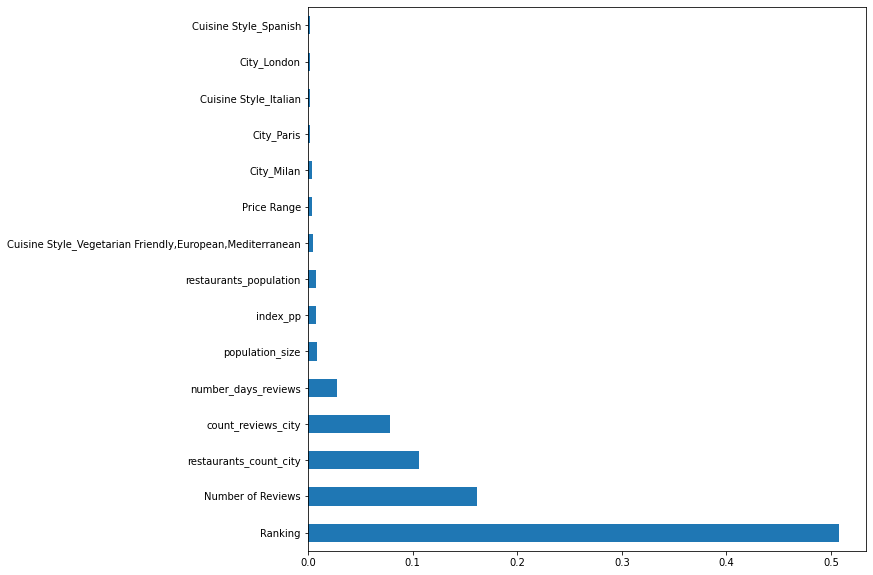

In [42]:
# In RandomForestRegressor it is possible to display the most important features for the model
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

**Submission**

In [43]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,"Cuisine Style_Afghani,Middle Eastern,Vegetarian Friendly","Cuisine Style_Afghani,Middle Eastern,Vegetarian Friendly,Halal","Cuisine Style_Afghani,Middle Eastern,Vegetarian Friendly,Vegan Options,Halal",Cuisine Style_African,"Cuisine Style_African,Asian,International,Native American,American,Bangladeshi,Vegetarian Friendly","Cuisine Style_African,Bar,Barbecue,Grill,Pub,Fusion,Wine Bar",...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
6050,1400.0,3.0,7.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7717,1005.0,1.0,18.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8254,5702.0,2.0,9.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3629,1213.0,1.0,66.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,4164.0,2.0,25.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4663,1342.0,2.0,3.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7061,107.0,3.0,112.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9280,7770.0,2.0,7.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5490,13393.0,2.0,7.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7399,1755.0,2.0,29.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
test_data = test_data.drop(['Rating'], axis=1)

In [45]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [46]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [47]:
predict_submission

array([3.   , 4.165, 4.4  , ..., 3.03 , 4.495, 4.31 ])

In [48]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.000
1,id_1,4.165
2,id_2,4.400
3,id_3,4.285
4,id_4,4.480
5,id_5,4.415
6,id_6,1.905
7,id_7,2.485
8,id_8,4.300
9,id_9,4.680
